<a href="https://colab.research.google.com/github/Bhasker-Paul/Basic-Python/blob/main/Bangladesh_Dengue_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/Bangladesh Dengue Data Analysis.csv')

#  **Quick Look at the Data**

In [ ]:
print(df.head())

   Gender  Age  NS1  IgG  IgM        Area     AreaType HouseType District  \
0  Female   45    0    0    0      Mirpur  Undeveloped  Building    Dhaka   
1    Male   17    0    0    1  Chawkbazar    Developed  Building    Dhaka   
2  Female   29    0    0    0      Paltan  Undeveloped     Other    Dhaka   
3  Female   63    1    1    0   Motijheel    Developed     Other    Dhaka   
4    Male   22    0    0    0    Gendaria  Undeveloped  Building    Dhaka   

   Outcome  
0        0  
1        0  
2        0  
3        1  
4        0  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7   HouseType  1000 non-null   object
 8   District   1000 non-null   object
 9   Outcome    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None


In [ ]:
df.dtypes

,0
Gender,object
Age,int64
NS1,int64
IgG,int64
IgM,int64
Area,object
AreaType,object
HouseType,object
District,object
Outcome,int64


In [ ]:
df.columns

Index(['Gender', 'Age', 'NS1', 'IgG', 'IgM', 'Area', 'AreaType', 'HouseType',
       'District', 'Outcome'],
      dtype='object')

In [ ]:
print(df['Outcome'].value_counts())


Outcome
1    533
0    467
Name: count, dtype: int64



## **Check for Missing Values**

In [ ]:
print(df.isnull().sum())

Gender       0
Age          0
NS1          0
IgG          0
IgM          0
Area         0
AreaType     0
HouseType    0
District     0
Outcome      0
dtype: int64


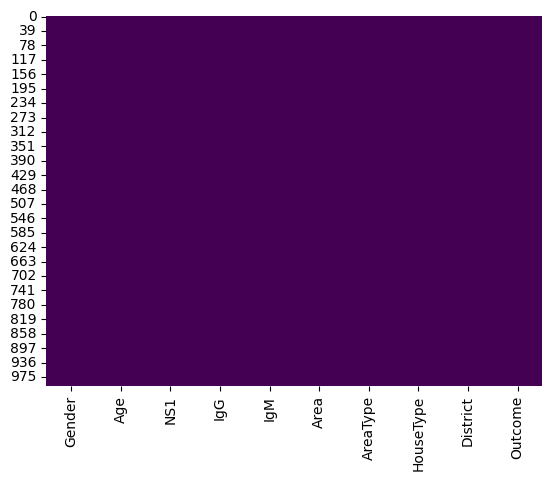

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis") # Check the null values by heatmap diagram
plt.show()

# **Exploratory Data Analysis**

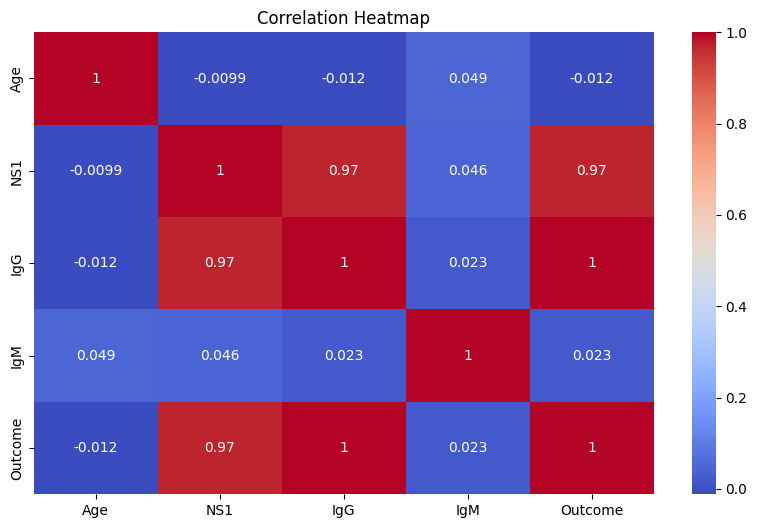

In [ ]:
plt.figure(figsize=(10, 6))
# Select only numerical columns before calculating the correlation matrix
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

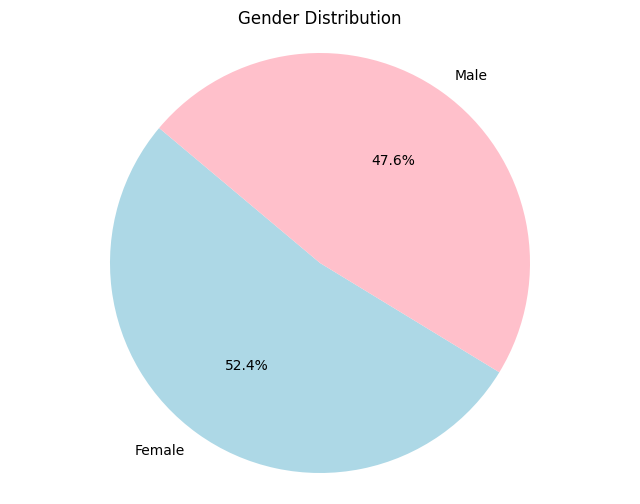

In [ ]:
gender_counts = df['Gender'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Ensures the pie is circular
plt.show()


<ipython-input-14-82616f01fc87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='magma')


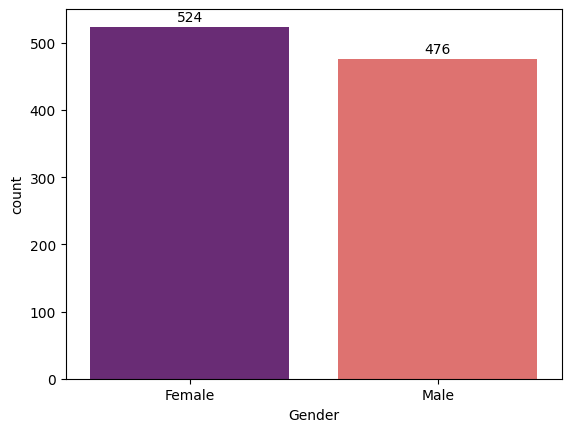

In [ ]:
sns.countplot(data=df, x='Gender', palette='magma')
for container in plt.gca().containers:
    plt.bar_label(container,label_type='edge',padding=2)

Text(0.5, 1.0, 'Distribution of Age')

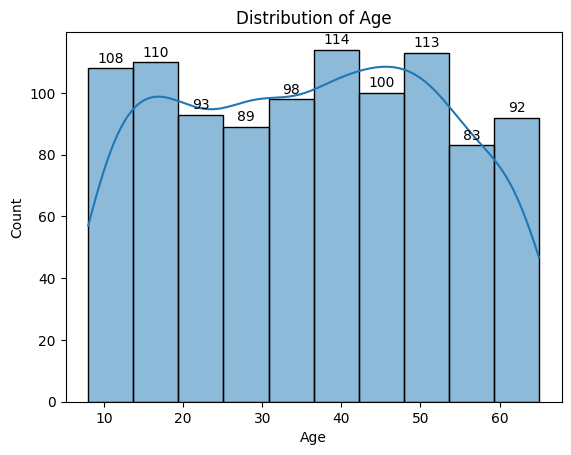

In [ ]:
sns.histplot(df['Age'],bins=10,kde=True)
for container in plt.gca().containers:
    plt.bar_label(container,label_type='edge',padding=2)
plt.title('Distribution of Age')

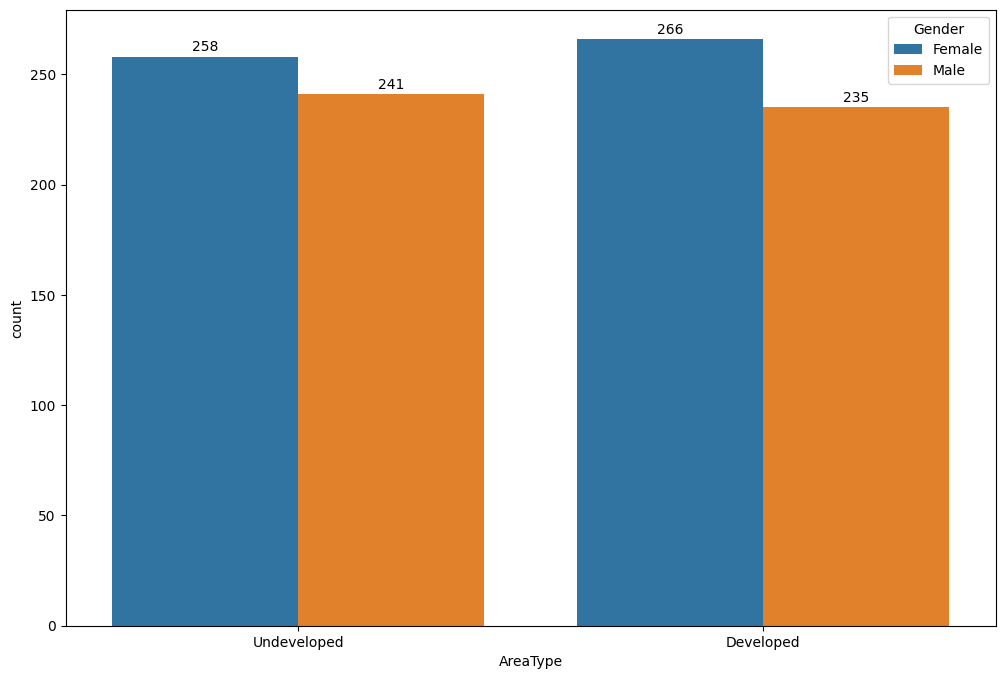

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='AreaType',hue='Gender')
for container in plt.gca().containers:
    plt.bar_label(container,label_type='edge',padding=2)

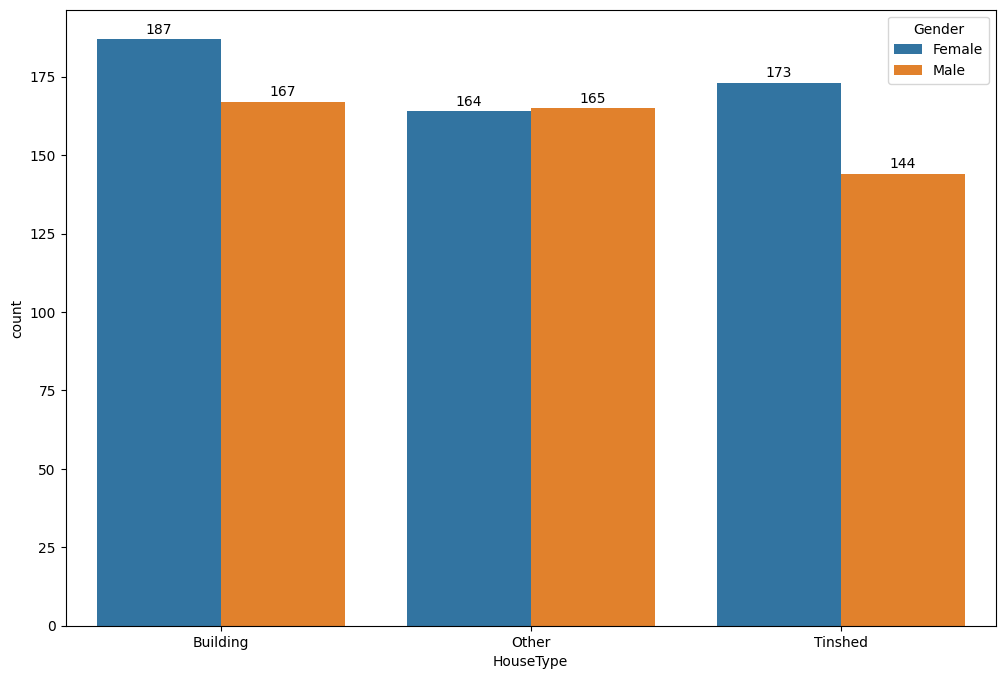

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='HouseType',hue='Gender')
for container in plt.gca().containers:
    plt.bar_label(container,label_type='edge',padding=2)

In [ ]:
df['District'].value_counts()

,count
District,
Dhaka,1000


In [ ]:
df['Area'].value_counts()

,count
Area,
Jatrabari,38
Demra,38
Mirpur,34
Kadamtali,34
Dhanmondi,34
Bangshal,34
New Market,33
Keraniganj,33
Paltan,31


<ipython-input-20-941d4086855a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Area',palette='deep')


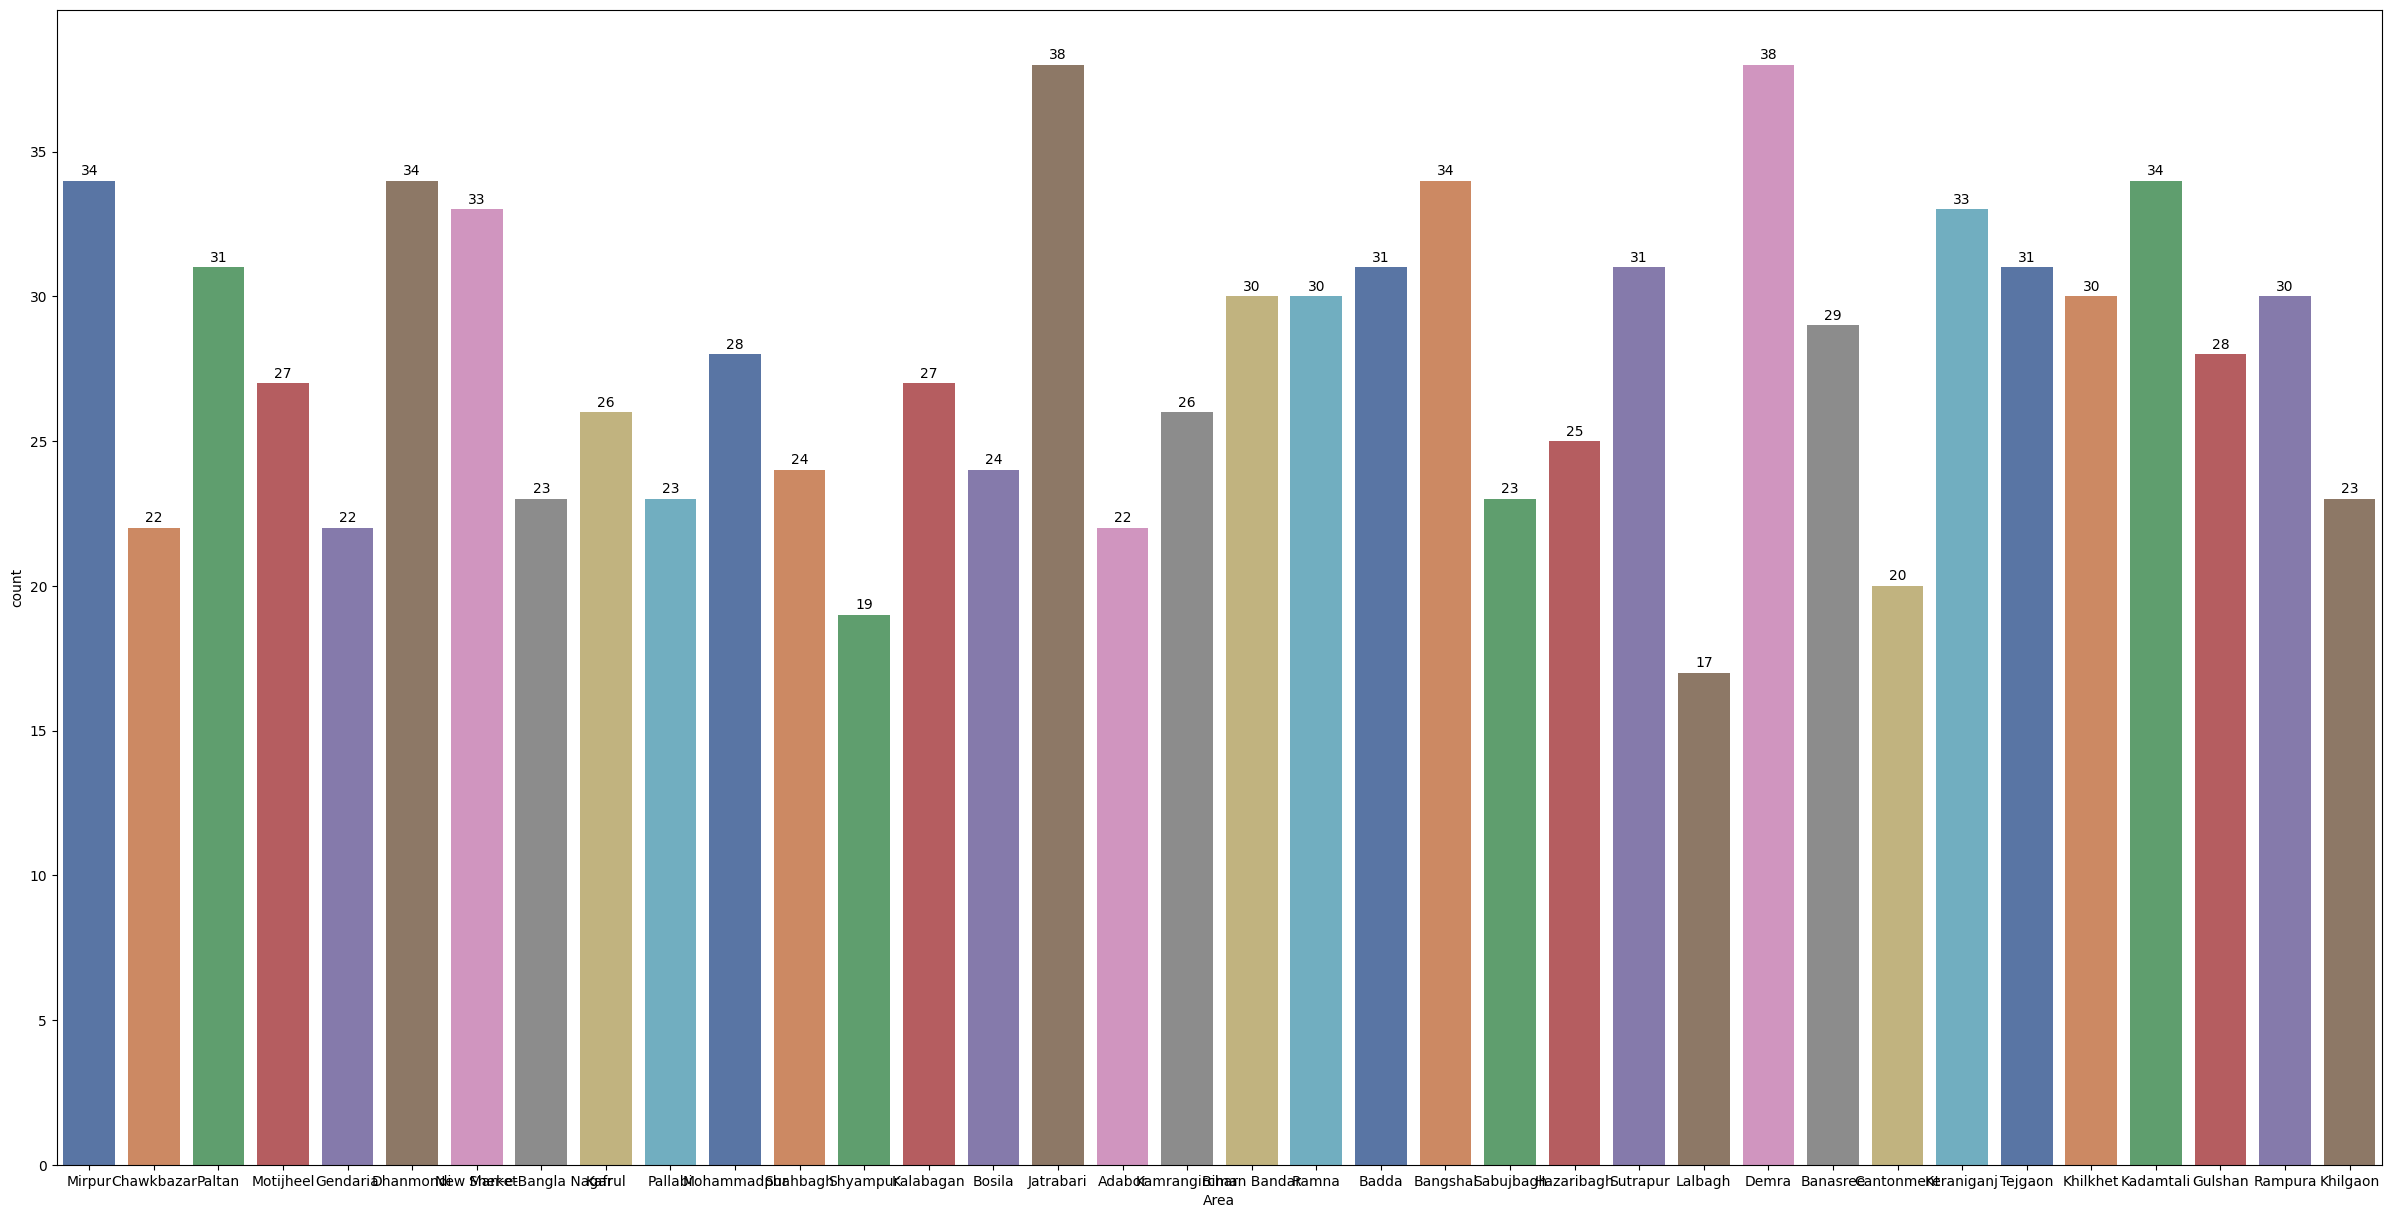

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data=df,x='Area',palette='deep')
for container in plt.gca().containers:
    plt.bar_label(container,label_type='edge',padding=2)

<Figure size 2000x800 with 0 Axes>

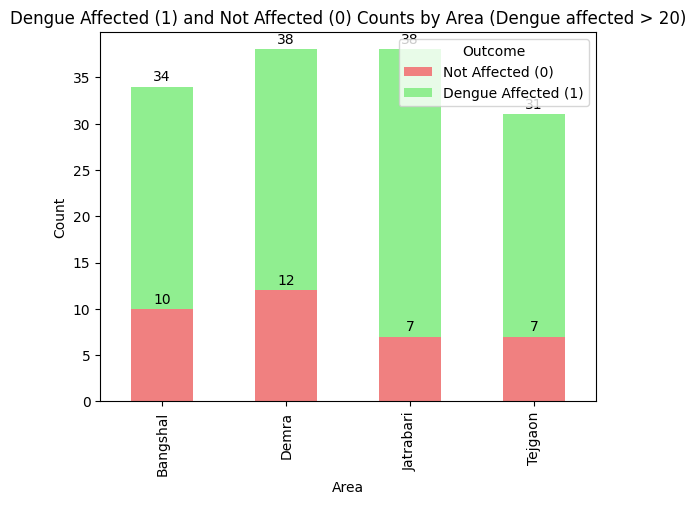

In [ ]:
plt.figure(figsize=(20,8))
area_outcome_counts = df.groupby(['Area', 'Outcome']).size().unstack()
area_outcome_counts_filtered = area_outcome_counts[area_outcome_counts[1] > 20]
area_outcome_counts_filtered.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
for container in plt.gca().containers:
    plt.bar_label(container,label_type='edge',padding=2)

plt.title('Dengue Affected (1) and Not Affected (0) Counts by Area (Dengue affected > 20)')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Not Affected (0)', 'Dengue Affected (1)'])
plt.show()

#  **Preprocess the data**

In [ ]:
categorical_columns = ['Gender', 'Area', 'AreaType', 'HouseType', 'District']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Dictionary to store results
results = {}

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
probs_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)

In [ ]:
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lr)}

accuracy = results['Logistic Regression']['Accuracy']
precision = results['Logistic Regression']['Precision']
recall = results['Logistic Regression']['Recall']
f1 = 2 * (precision * recall) / (precision + recall)


print("Logistic Regression Results:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  F1-Score: {f1:.2f}\n")

Logistic Regression Results:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



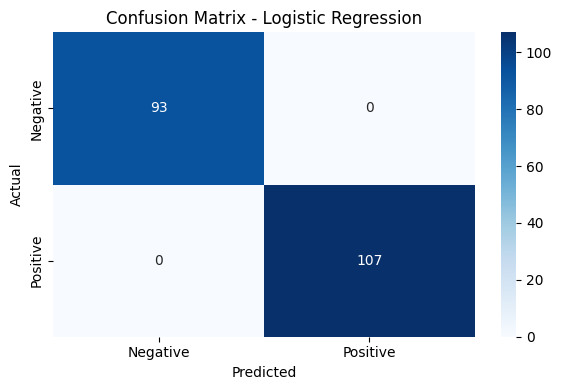

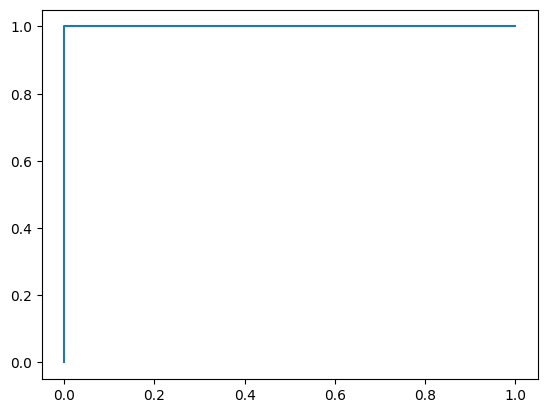

In [ ]:
visualize_confusion_matrix(results['Logistic Regression']['Confusion Matrix'], 'Logistic Regression')
plot_roc_curve(fpr_lr, tpr_lr, 'Logistic Regression')

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
probs_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, probs_nb)

results['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_nb)
}
print("Naive Bayes Result:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  F1-Score: {f1:.2f}\n")

Naive Bayes Result:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



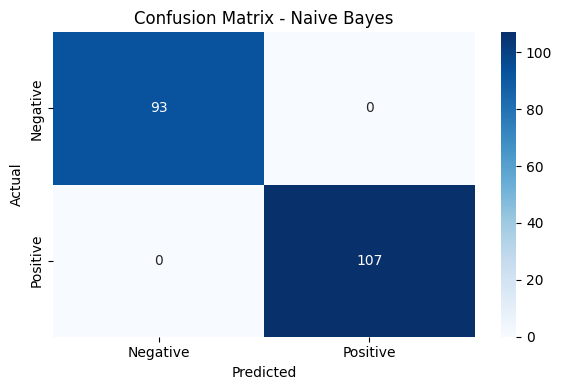

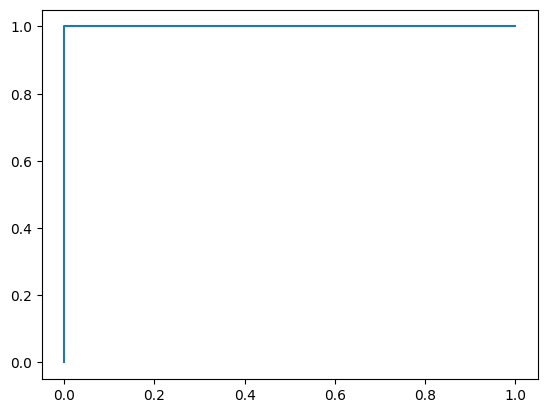

In [ ]:
visualize_confusion_matrix(results['Naive Bayes']['Confusion Matrix'], 'Naive Bayes')
plot_roc_curve(fpr_nb, tpr_nb, 'Naive Bayes')

In [ ]:
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dt)
}
print("Decision Tree:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  F1-Score: {f1:.2f}\n")

Decision Tree:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



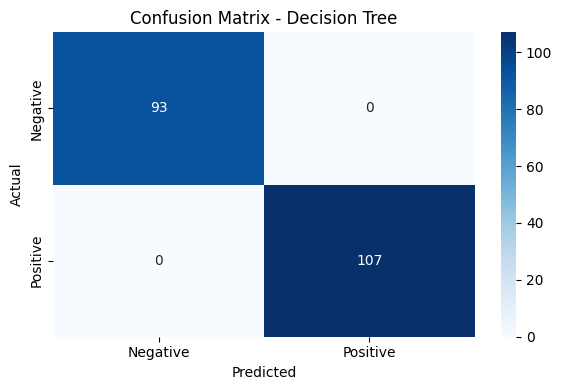

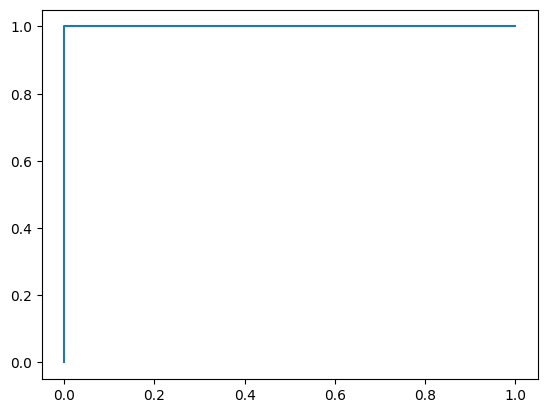

In [ ]:
visualize_confusion_matrix(results['Decision Tree']['Confusion Matrix'], 'Decision Tree')
plot_roc_curve(fpr_dt, tpr_dt, 'Decision Tree')

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
probs_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf)
}
print("Random Forest:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  F1-Score: {f1:.2f}\n")

Random Forest:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



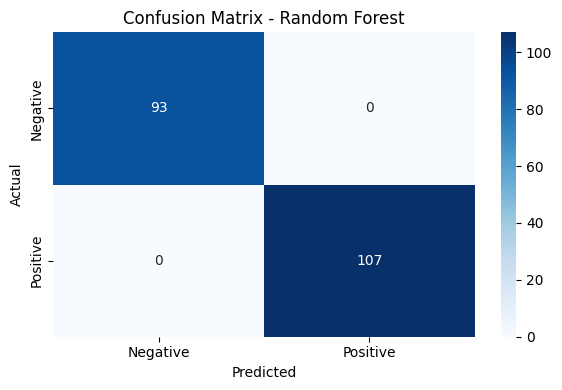

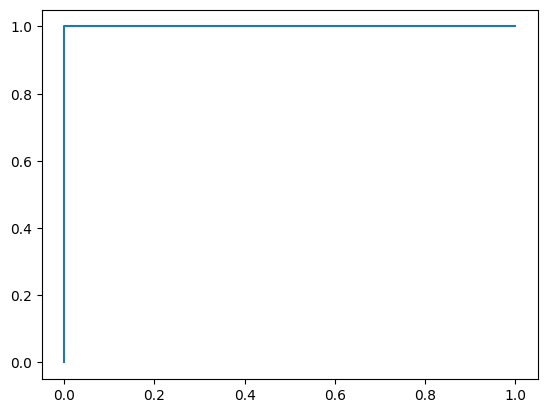

In [ ]:
visualize_confusion_matrix(results['Random Forest']['Confusion Matrix'], 'Random Forest')
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest')


In [ ]:
# Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
probs_svc = svc.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, probs_svc)
results['Support Vector Machine'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svc),
    'Precision': precision_score(y_test, y_pred_svc),
    'Recall': recall_score(y_test, y_pred_svc),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_svc)
}
print("Support Vector Machine:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  F1-Score: {f1:.2f}\n")

Support Vector Machine:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



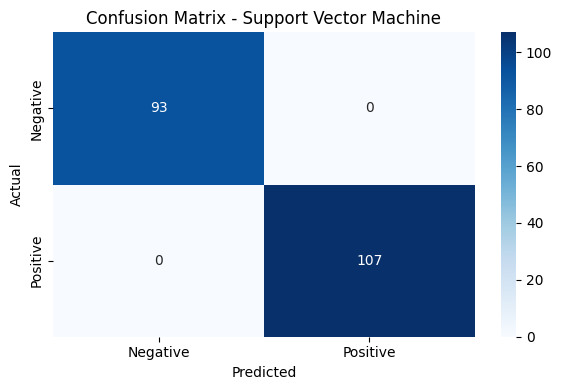

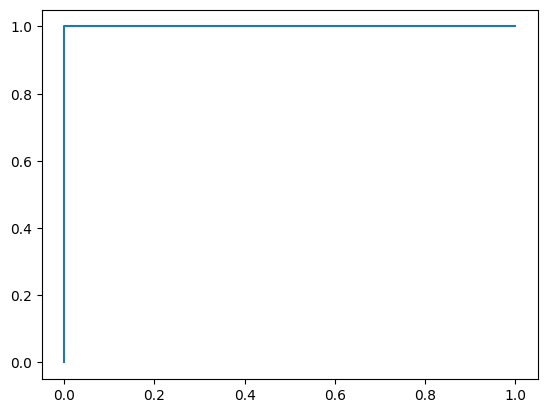

In [ ]:
visualize_confusion_matrix(results['Support Vector Machine']['Confusion Matrix'], 'Support Vector Machine')
plot_roc_curve(fpr_svc, tpr_svc, 'Support Vector Machine')

In [ ]:
# Artificial Neural Network
ann = MLPClassifier(random_state=42, max_iter=300)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
probs_ann = ann.predict_proba(X_test)[:, 1]
fpr_ann, tpr_ann, _ = roc_curve(y_test, probs_ann)
results['Artificial Neural Network'] = {
    'Accuracy': accuracy_score(y_test, y_pred_ann),
    'Precision': precision_score(y_test, y_pred_ann),
    'Recall': recall_score(y_test, y_pred_ann),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_ann)}
print("Artificial Neural Network:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  F1-Score: {f1:.2f}\n")


Artificial Neural Network:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



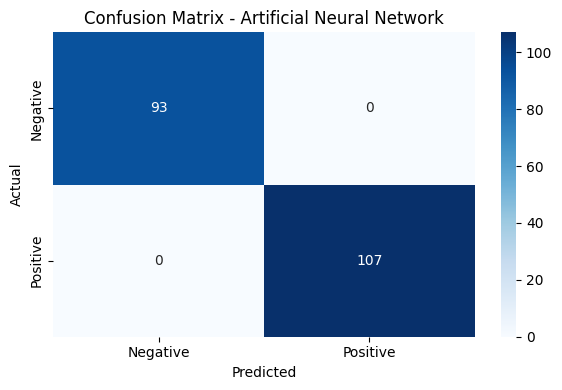

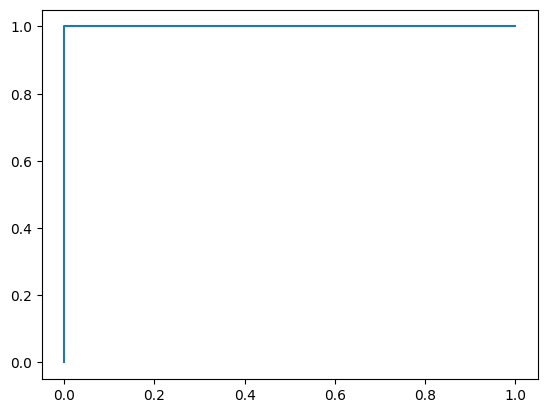

In [ ]:
visualize_confusion_matrix(results['Artificial Neural Network']['Confusion Matrix'], 'Artificial Neural Network')
plot_roc_curve(fpr_ann, tpr_ann, 'Artificial Neural Network')

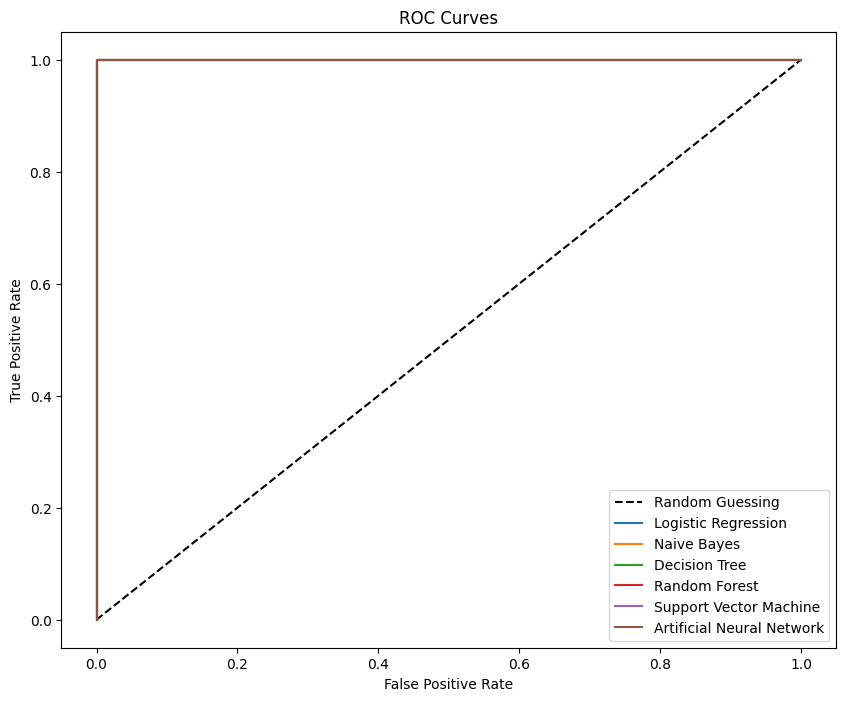

In [ ]:
# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svc, tpr_svc, label='Support Vector Machine')
plt.plot(fpr_ann, tpr_ann, label='Artificial Neural Network')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Display results
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:")
            print(value)
        else:
            print(f"{metric}: {value:.2f}")


Logistic Regression:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[ 93   0]
 [  0 107]]

Naive Bayes:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[ 93   0]
 [  0 107]]

Decision Tree:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[ 93   0]
 [  0 107]]

Random Forest:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[ 93   0]
 [  0 107]]

Support Vector Machine:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[ 93   0]
 [  0 107]]

Artificial Neural Network:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[ 93   0]
 [  0 107]]
